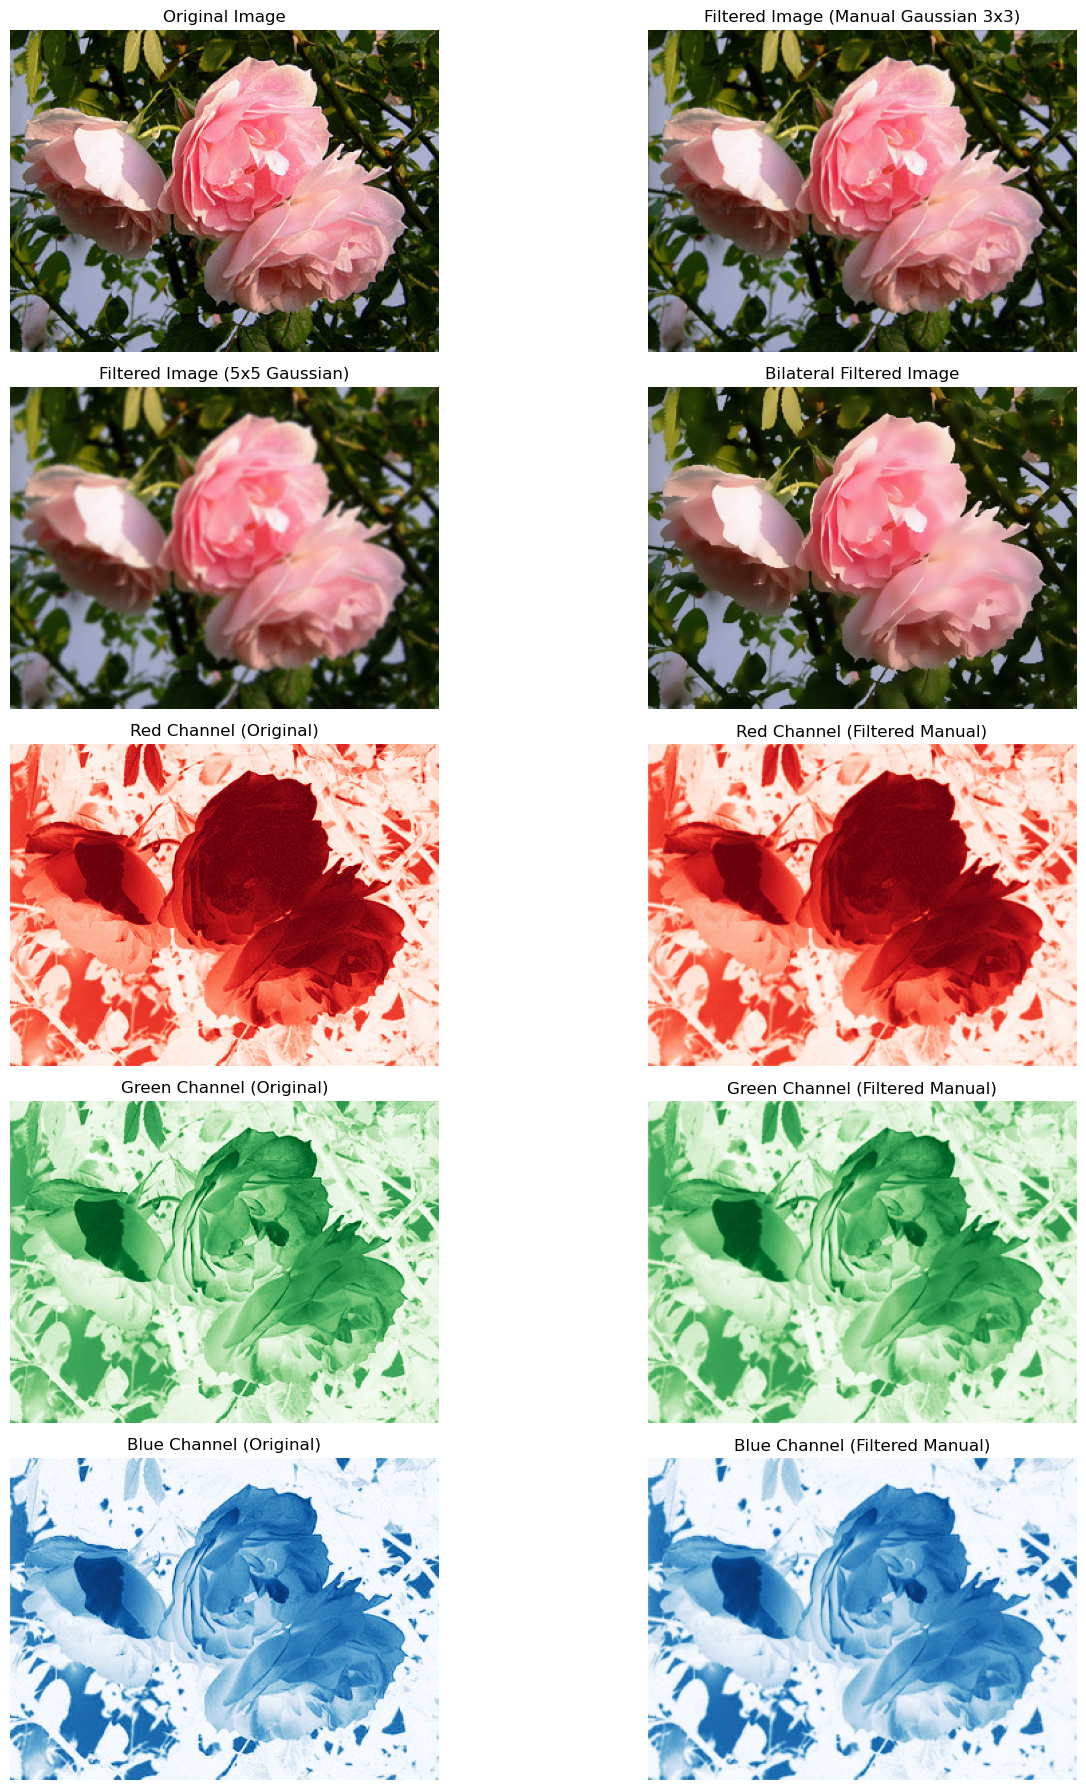

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# ------------------------------
# Theoretical Background:
# ------------------------------

# 1. Gaussian Filter:
# The Gaussian filter is a smoothing filter used to blur images. It reduces noise and detail. The kernel is based on the Gaussian function.
# It works by assigning more weight to the center of the kernel and gradually decreasing the weight towards the edges.
# The standard deviation (sigma) controls the spread of the Gaussian, and the kernel size determines how much surrounding pixels are considered.
# The result is a smoother image with reduced high-frequency noise.

# 2. 5x5 Gaussian Filter:
# A larger Gaussian filter (5x5) uses a larger kernel, which means it considers a bigger neighborhood around each pixel.
# This typically results in a stronger blurring effect compared to a smaller kernel, but it also may lead to more loss of image detail.

# 3. Bilateral Filter:
# The bilateral filter is a non-linear filter that preserves edges while smoothing other regions of the image.
# It considers both spatial distance (proximity of pixels) and intensity difference (color similarity) when averaging pixels,
# ensuring that pixels near edges are not blurred as much as those in uniform regions.

# ------------------------------
# Functions and Main Code:
# ------------------------------

# Create the Gaussian kernel
def create_gaussian_kernel(size, sigma):
    """Create a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) *
                     np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# Manually apply the Gaussian filter
def apply_gaussian_filter_manual(image, kernel):
    """Manually apply Gaussian filter to the image."""
    pad_width = kernel.shape[0] // 2
    padded_image = np.pad(image, ((pad_width, pad_width), (pad_width, pad_width)), mode='constant', constant_values=0)  # Fix padding
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):  # Iterate over the height of the image
        for j in range(image.shape[1]):  # Iterate over the width of the image
            # Apply kernel on each pixel in the neighborhood
            filtered_image[i, j] = np.sum(
                padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel
            )
    
    return filtered_image

# Step 1: Load a sample image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed

# Step 2: Create the Gaussian kernel (3x3)
kernel = create_gaussian_kernel(3, 0.5)

# Step 3: Apply the Gaussian filter manually to each channel (R, G, B)
R_channel_manual = apply_gaussian_filter_manual(image[:, :, 0], kernel)
G_channel_manual = apply_gaussian_filter_manual(image[:, :, 1], kernel)
B_channel_manual = apply_gaussian_filter_manual(image[:, :, 2], kernel)

# Combine the filtered channels back into an image
filtered_image_manual = np.stack([R_channel_manual, G_channel_manual, B_channel_manual], axis=2)

# ------------------------------
# 5x5 Gaussian Filter (OpenCV)
# ------------------------------

# Step 4: Apply 5x5 Gaussian filter using OpenCV
gaussian_kernel_5x5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]], dtype=np.float32)
gaussian_kernel_5x5 /= np.sum(gaussian_kernel_5x5)  # Normalize the kernel

filtered_image_5x5 = cv2.filter2D(image, -1, gaussian_kernel_5x5)

# ------------------------------
# Bilateral Filter (OpenCV)
# ------------------------------

# Step 5: Apply bilateral filter using OpenCV
bilateral_filtered_image = cv2.bilateralFilter(image, 9, 75, 75)

# ------------------------------
# Plotting Results
# ------------------------------

# Plot the original and filtered images, as well as the individual R, G, B channels
plt.figure(figsize=(15, 18))

# Column 1: Original Images and Filtered Results
# Original Image
plt.subplot(5, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Manually Filtered Image (Gaussian 3x3)
plt.subplot(5, 2, 2)
plt.imshow(filtered_image_manual)
plt.title("Filtered Image (Manual Gaussian 3x3)")
plt.axis('off')

# Filtered Image with 5x5 Gaussian
plt.subplot(5, 2, 3)
plt.imshow(filtered_image_5x5)
plt.title("Filtered Image (5x5 Gaussian)")
plt.axis('off')

# Bilateral Filtered Image
plt.subplot(5, 2, 4)
plt.imshow(bilateral_filtered_image)
plt.title("Bilateral Filtered Image")
plt.axis('off')

# Column 2: R, G, B Channels
# Red Channel (Original)
plt.subplot(5, 2, 5)
plt.imshow(image[:, :, 0], cmap='Reds')
plt.title("Red Channel (Original)")
plt.axis('off')

# Red Channel (Filtered Manual)
plt.subplot(5, 2, 6)
plt.imshow(R_channel_manual, cmap='Reds')
plt.title("Red Channel (Filtered Manual)")
plt.axis('off')

# Green Channel (Original)
plt.subplot(5, 2, 7)
plt.imshow(image[:, :, 1], cmap='Greens')
plt.title("Green Channel (Original)")
plt.axis('off')


# Green Channel (Filtered Manual)
plt.subplot(5, 2, 8)
plt.imshow(G_channel_manual, cmap='Greens')
plt.title("Green Channel (Filtered Manual)")
plt.axis('off')

# Blue Channel (Original)
plt.subplot(5, 2, 9)
plt.imshow(image[:, :, 2], cmap='Blues')
plt.title("Blue Channel (Original)")
plt.axis('off')

# Blue Channel (Filtered Manual)
plt.subplot(5, 2, 10)
plt.imshow(B_channel_manual, cmap='Blues')
plt.title("Blue Channel (Filtered Manual)")
plt.axis('off')

plt.tight_layout()
plt.show()
